# <font color=red>Unemployement in India</font>

### Importing the dataset

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### <font color=blue>Few Questions raised by looking at the data</font>
1. How many states are there?
 2. Is there any missing data?
 3. WHat are the ranges of months present in the dataset?
 4. Whcih states having the highest & lowest Unmeployment recorded?
 5. Which states has the highest & lowest Employmnet?
 6. Which states affected mostly due to Unemploymnet?

### Renaming columns

In [3]:
df.rename(columns={'Region': 'State'}, inplace=True)

In [4]:
df.rename(columns={'Region.1': 'Region'}, inplace=True)

In [5]:
df.rename(columns={' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate'}, inplace=True)

In [6]:
df.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [7]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Statistics about the data

In [8]:
df.shape

(267, 9)

In [9]:
df.describe

<bound method NDFrame.describe of               State         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.

In [10]:
# Arunachal Pradesh data is not recorded
df['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [11]:
df['Region'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [12]:
# Total states in India are 28
len(df['State'].unique())

27

In [13]:
start_date = df[' Date'].min()
end_date = df[' Date'].max()

In [14]:
start_date

' 29-02-2020'

In [15]:
end_date

' 31-10-2020'

In [16]:
df[' Frequency'].value_counts()

 Frequency
 M    267
Name: count, dtype: int64

### Visualizing

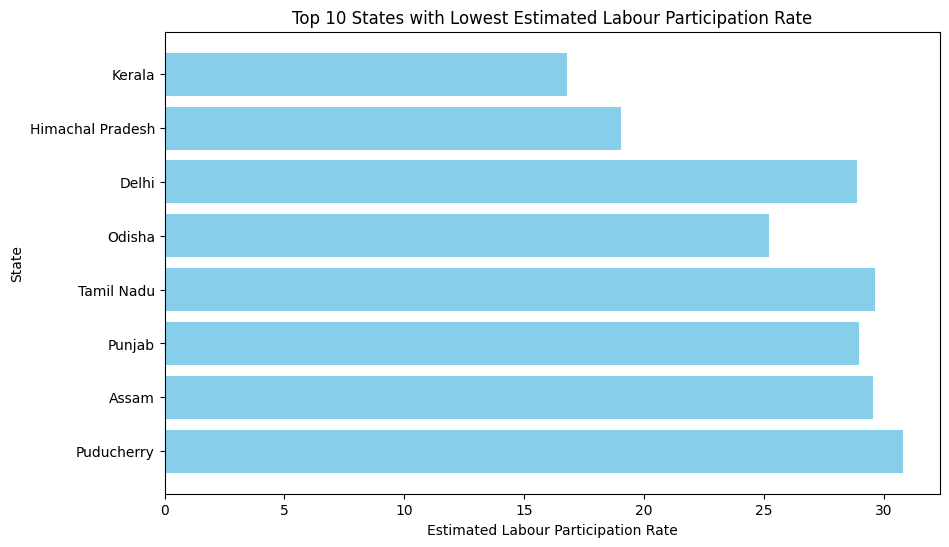

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by the "Estimated Labour Participation Rate (%)" column in ascending order
sorted_df = df.sort_values(by='Estimated Labour Participation Rate', ascending=True)

# Selecting the top 10 states with the lowest estimated labor participation rate
top_10_states_lowest_participation = sorted_df.head(10)

# Creating a bar plot for the top 10 states with lowest participation rates
plt.figure(figsize=(10, 6))
plt.barh(top_10_states_lowest_participation['State'], top_10_states_lowest_participation['Estimated Labour Participation Rate'], color='skyblue')
plt.xlabel('Estimated Labour Participation Rate')
plt.ylabel('State')
plt.title('Top 10 States with Lowest Estimated Labour Participation Rate')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()


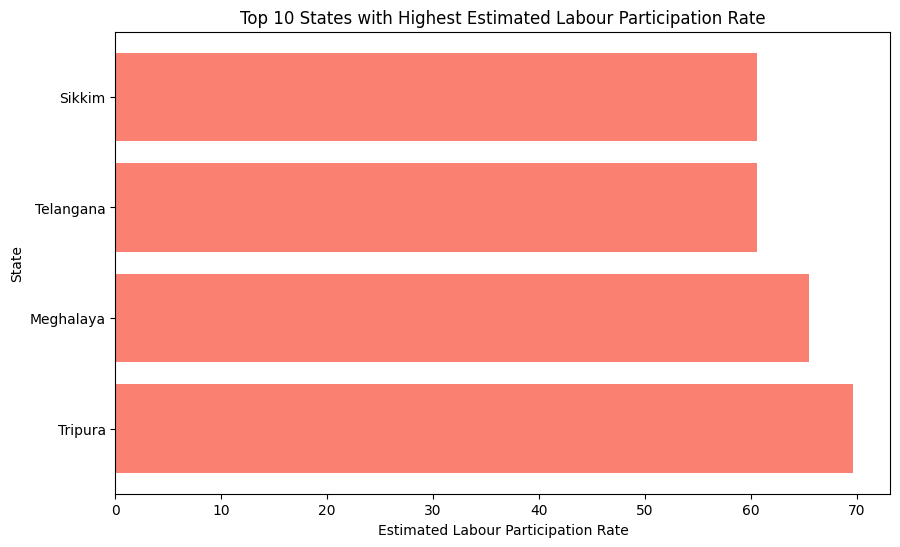

In [37]:
top_10_states_highest_participation = sorted_df.tail(10)

# Creating a bar plot for the top 10 states with highest participation rates
plt.figure(figsize=(10, 6))
plt.barh(top_10_states_highest_participation['State'], top_10_states_highest_participation['Estimated Labour Participation Rate'], color='salmon')
plt.xlabel('Estimated Labour Participation Rate')
plt.ylabel('State')
plt.title('Top 10 States with Highest Estimated Labour Participation Rate')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()


### Getting Insights

In [17]:
print(df[df[' Estimated Unemployment Rate (%)']==df[' Estimated Unemployment Rate (%)'].min()])

         State         Date  Frequency   Estimated Unemployment Rate (%)  \
116  Karnataka   31-08-2020          M                               0.5   

      Estimated Employed  Estimated Labour Participation Rate Region  \
116             24094289                                43.13  South   

     longitude  latitude  
116    15.3173   75.7139  


In [18]:
print(f"Karnataka has Lowest Unemployment Rate of: \033[1m {df[' Estimated Unemployment Rate (%)'].min()} \033[0m")

Karnataka has Lowest Unemployment Rate of:  0.5 


In [19]:
print(df[df[' Estimated Unemployment Rate (%)']==df[' Estimated Unemployment Rate (%)'].max()])

          State         Date  Frequency   Estimated Unemployment Rate (%)  \
172  Puducherry   30-04-2020          M                             75.85   

      Estimated Employed  Estimated Labour Participation Rate Region  \
172               117542                                 39.3  South   

     longitude  latitude  
172    11.9416   79.8083  


In [20]:
print(f"Puduchery has Highest Unemployment Rate: \033[1m {df[' Estimated Unemployment Rate (%)'].max()} \033[0m")

Puduchery has Highest Unemployment Rate:  75.85 


In [21]:
print(df[df[' Estimated Employed']==df[' Estimated Employed'].min()])

          State         Date  Frequency   Estimated Unemployment Rate (%)  \
172  Puducherry   30-04-2020          M                             75.85   

      Estimated Employed  Estimated Labour Participation Rate Region  \
172               117542                                 39.3  South   

     longitude  latitude  
172    11.9416   79.8083  


In [22]:
print(f"State having least Employment: \033[1m{df[' Estimated Employed'].min()} \033[0m")

State having least Employment: 117542 


In [23]:
print(df[df[' Estimated Employed']==df[' Estimated Employed'].max()])

             State         Date  Frequency   Estimated Unemployment Rate (%)  \
237  Uttar Pradesh   31-01-2020          M                              7.58   

      Estimated Employed  Estimated Labour Participation Rate Region  \
237             59433759                                39.63  North   

     longitude  latitude  
237    26.8467   80.9462  


In [24]:
print(f"State having high Employment: \033[1m{df[' Estimated Employed'].max()} \033[0m")

State having high Employment: 59433759 


In [25]:
df["Region"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [26]:
regions_count = df["Region"].value_counts()

In [27]:
# Calculate the Unemployment percentage for each region
region_percentages = (regions_count / len(df)) * 100
region_percentages

Region
North        29.588015
South        22.471910
West         18.726592
East         14.981273
Northeast    14.232210
Name: count, dtype: float64

In [30]:
# Sort by Estimated Unemployment Rate in ascending order
low_rate_month = df.sort_values(by=' Estimated Unemployment Rate (%)').iloc[0][' Date']

# Sort by Estimated Unemployment Rate in descending order
high_rate_month = df.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False).iloc[0][' Date']


In [31]:
df[' Date'] = df[' Date'].str.strip()  # Strip leading and trailing spaces from date values

date_column = pd.to_datetime(df[" Date"], format='%d-%m-%Y', dayfirst=True)
rate_column = df[" Estimated Unemployment Rate (%)"]

# Create a DataFrame from the columns
new_df = pd.DataFrame({' Date': date_column, ' Estimated Unemployment Rate (%)': rate_column})

low_rate_percentage = min(rate_column)
high_rate_percentage = max(rate_column)

# Finding the month with the lowest and highest unemployment rates
low_rate_month = new_df.sort_values(by=' Estimated Unemployment Rate (%)').iloc[0][' Date']
high_rate_month = new_df.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False).iloc[0][' Date']

print(f"Month with the lowest Unemployment rate: \033[1m {low_rate_month.strftime('%B %Y')} \033[0m (Percentage: {low_rate_percentage:.2f}%)")
print(f"Month with the highest Unemployment rate: \033[1m {high_rate_month.strftime('%B %Y')} \033[0m (Percentage: {high_rate_percentage:.2f}%)")

Month with the lowest Unemployment rate:  August 2020  (Percentage: 0.50%)
Month with the highest Unemployment rate:  April 2020  (Percentage: 75.85%)


### Understanding the relations

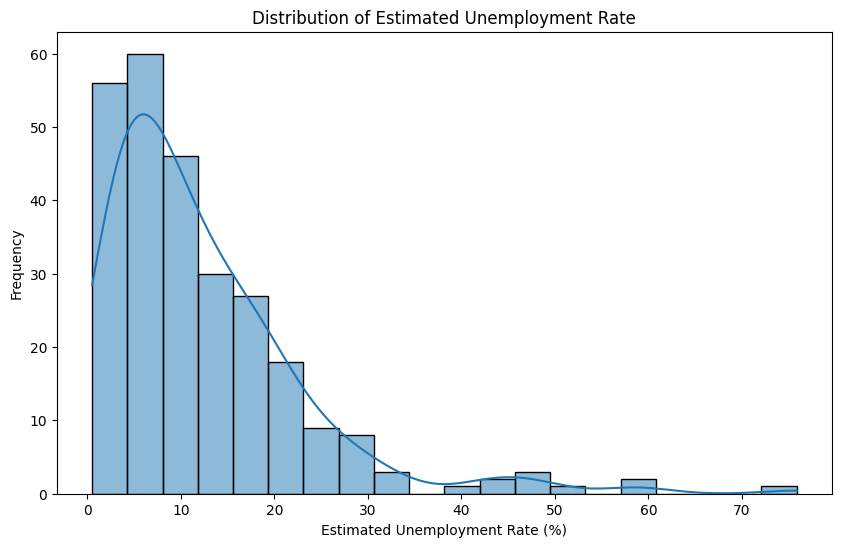

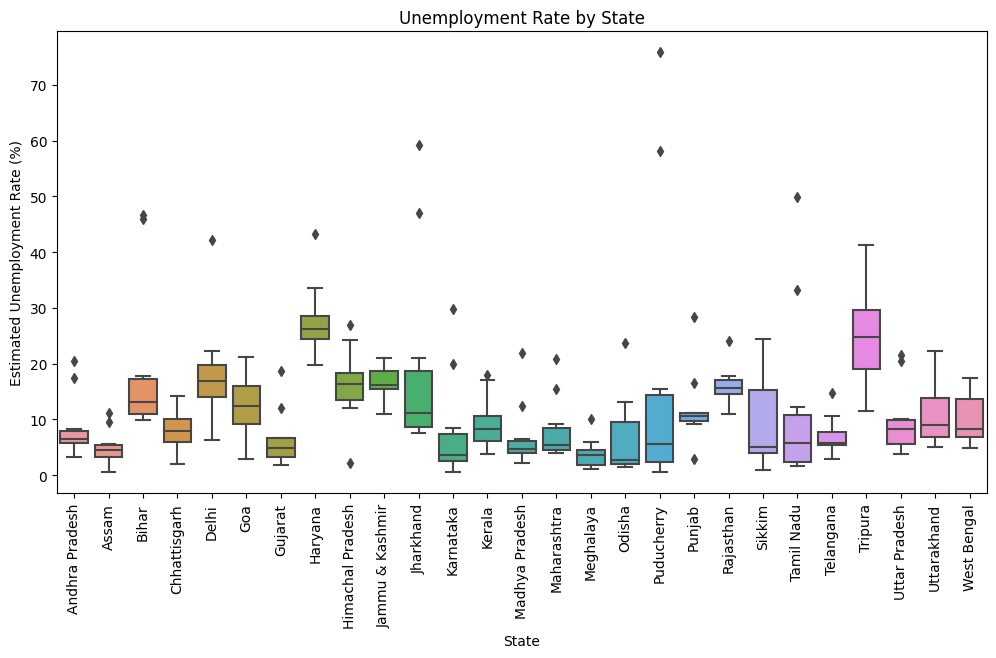

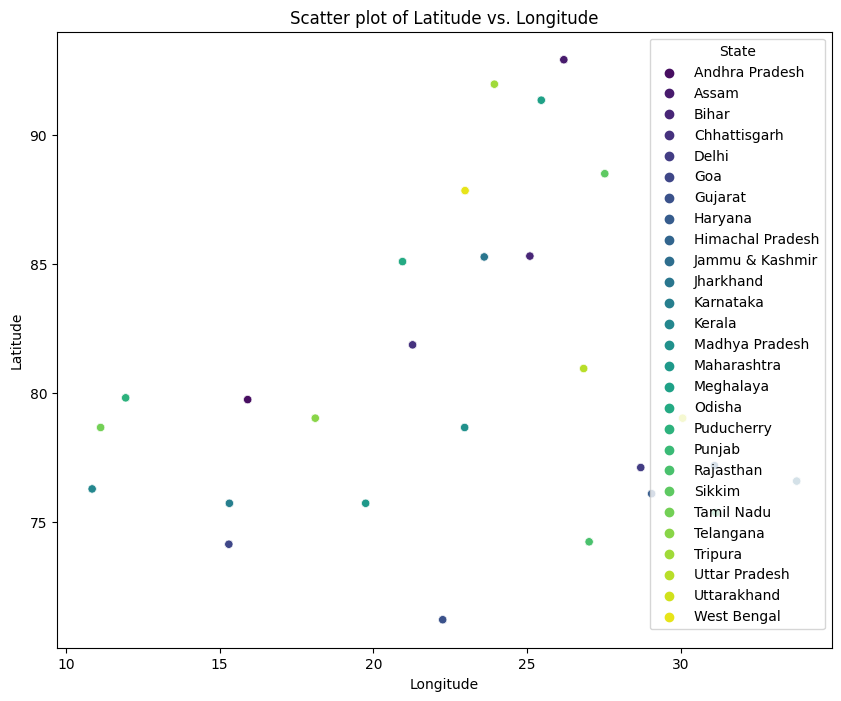

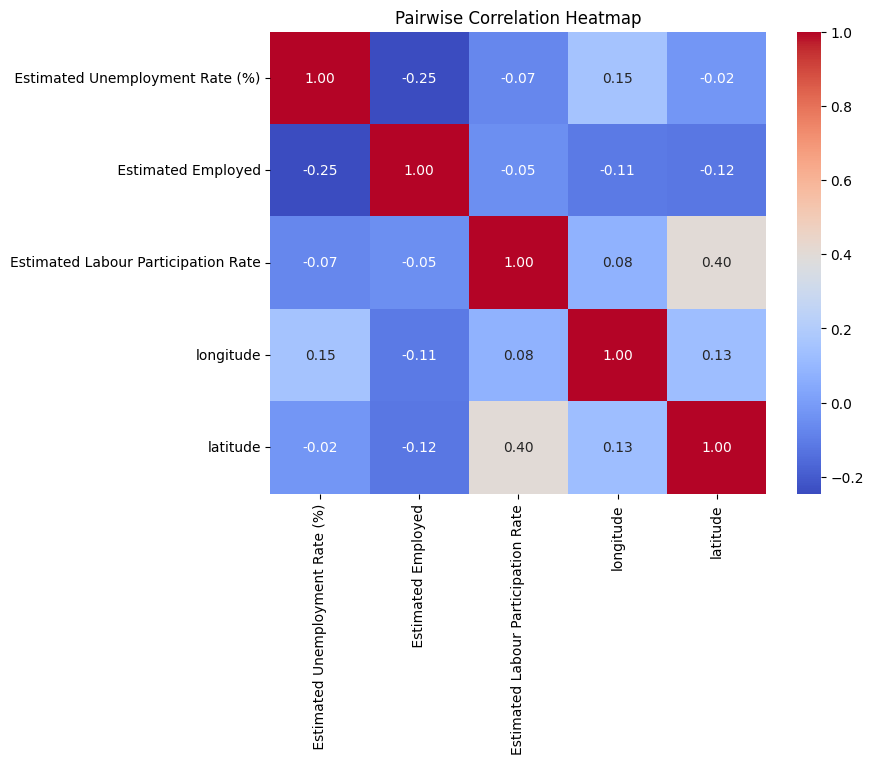

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 6))

# Example 1: Distribution of Estimated Unemployment Rate
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Unemployment Rate')
plt.show()

# Increase the figure size
plt.figure(figsize=(12, 6))

# Example 2: Unemployment Rate by State
sns.boxplot(x='State', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by State')
plt.show()

# Increase the figure size
plt.figure(figsize=(10, 8))

# Example 3: Scatter plot of Latitude vs. Longitude
sns.scatterplot(x='longitude', y='latitude', data=df, hue='State', palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Latitude vs. Longitude')
plt.show()

# Increase the figure size
plt.figure(figsize=(8, 6))

numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

## <font color=green>Insights</font>

 1. Total number of states in India are 28. But 27 states data only recorded
 2. Data regarding "Arunachal Pradesh" is not recorded
 3. The data is recorded from 29-02-2020 to 31-10-2020. That means 8 months of year 2020 is recorded.
 4. For 100% unemployement rate:
 - Karnataka has Lowest Unemployment Rate of :  0.5
 - Puduchery has Highest Unemployment Rate :  75.85 
 4. With a count of "117542" people, Puducherry has least Employment
 5. With a count of "59433759" people, Uttar Pradesh has high Employment
 6. Northern Region with 29.588015% is mostly effected for Unemployment.
 7. Northeast region with 14.232210% is the low effected region
 